In [ ]:
# Credit Risk Segmentation

## Objective
Segment customers into risk levels (LOW, MEDIUM, HIGH) based on outstanding debt
and payment delay metrics to support credit decision-making.

In [1]:
import pandas as pd
df = pd.read_csv("credit_transactions.csv")
df.head()

,transaction_id,customer_id,transaction_date,total_amount,paid_amount,days_past_due
0,1,C001,2024-01-05,1500,1500,0
1,2,C001,2024-02-10,1800,1800,0
2,3,C002,2024-01-12,2200,1800,15
3,4,C002,2024-03-01,2000,1500,30
4,5,C003,2024-01-20,3000,1000,60


In [9]:
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    15 non-null     int64  
 1   customer_id       15 non-null     object 
 2   transaction_date  15 non-null     object 
 3   total_amount      15 non-null     int64  
 4   paid_amount       15 non-null     int64  
 5   days_past_due     15 non-null     int64  
 6   outstanding_debt  15 non-null     int64  
 7   payment_ratio     15 non-null     float64
dtypes: float64(1), int64(5), object(2)
memory usage: 1.1+ KB


,transaction_id,total_amount,paid_amount,days_past_due,outstanding_debt,payment_ratio
count,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000
mean,8.000000,2380.00000,1573.333333,28.666667,806.666667,0.742097
std,4.472136,1123.26056,647.485981,30.906926,920.765727,0.281435
min,1.000000,800.00000,500.000000,0.000000,0.000000,0.200000
25%,4.500000,1650.00000,1100.000000,0.000000,0.000000,0.612500
50%,8.000000,2200.00000,1500.000000,20.000000,500.000000,0.769231
75%,11.500000,2800.00000,1800.000000,52.500000,1750.000000,1.000000
max,15.000000,5000.00000,3000.000000,90.000000,2500.000000,1.000000


In [14]:
df["outstanding_debt"] = df["total_amount"] - df["paid_amount"]
df["payment_ratio"] = df["paid_amount"] / df["total_amount"]

In [13]:
summary = df.groupby("customer_id").agg({
    "total_amount": "sum",
    "paid_amount": "sum",
    "outstanding_debt": "sum",
    "days_past_due": "mean",
    "payment_ratio": "mean"
}).reset_index()

summary.head()

,customer_id,total_amount,paid_amount,outstanding_debt,days_past_due,payment_ratio
0,C001,3300,3300,0,0.0,1.000000
1,C002,4200,3300,900,22.5,0.784091
2,C003,5500,1500,4000,75.0,0.266667
3,C004,2600,2600,0,0.0,1.000000
4,C005,9000,5500,3500,52.5,0.612500


In [15]:
summary["risk_level"] = "LOW"

summary.loc[
    (summary["outstanding_debt"] > 1000) &
    (summary["outstanding_debt"] <= 3000),
    "risk_level"
] = "MEDIUM"

summary.loc[
    (summary["outstanding_debt"] > 3000) |
    (summary["days_past_due"] > 60),
    "risk_level"
] = "HIGH"

summary.head()

,customer_id,total_amount,paid_amount,outstanding_debt,days_past_due,payment_ratio,risk_level
0,C001,3300,3300,0,0.0,1.000000,LOW
1,C002,4200,3300,900,22.5,0.784091,LOW
2,C003,5500,1500,4000,75.0,0.266667,HIGH
3,C004,2600,2600,0,0.0,1.000000,LOW
4,C005,9000,5500,3500,52.5,0.612500,HIGH


In [16]:
risk_summary = summary.groupby("risk_level").agg({
    "customer_id": "count",
    "outstanding_debt": "sum",
    "days_past_due": "mean"
}).reset_index()

risk_summary

,risk_level,customer_id,outstanding_debt,days_past_due
0,HIGH,3,10000,67.5
1,LOW,5,900,4.5
2,MEDIUM,1,1200,27.5


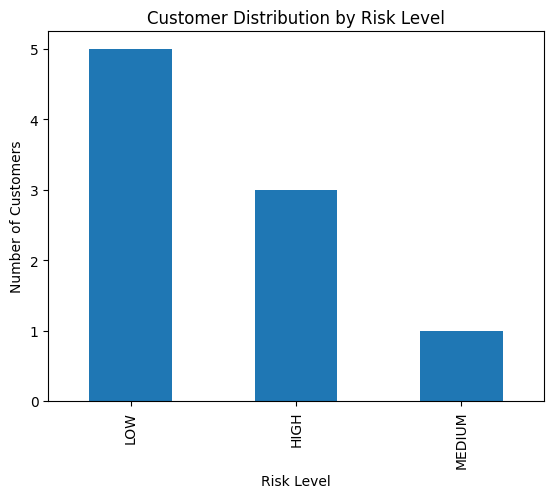

In [18]:
import matplotlib.pyplot as plt

summary["risk_level"].value_counts().plot(kind="bar")
plt.title("Customer Distribution by Risk Level")
plt.xlabel("Risk Level")
plt.ylabel("Number of Customers")
plt.show()

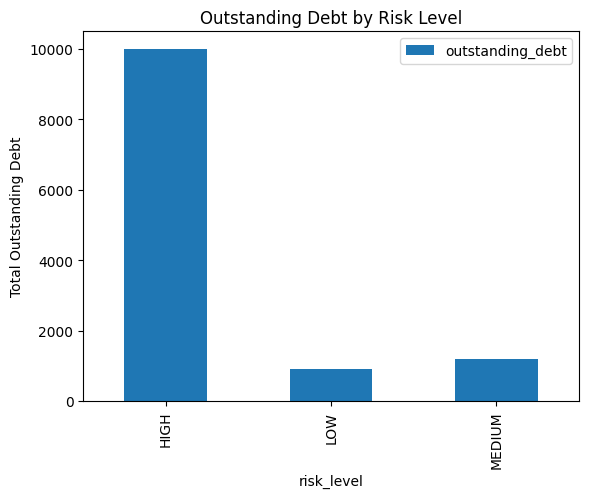

In [19]:
risk_summary.plot(
    x="risk_level",
    y="outstanding_debt",
    kind="bar"
)
plt.title("Outstanding Debt by Risk Level")
plt.ylabel("Total Outstanding Debt")
plt.show()

In [ ]:
### Key Insights

- High-risk customers represent a smaller segment but concentrate a significant portion of the outstanding debt.
- Customers classified as high risk show substantially higher average days past due.
- Risk segmentation enables targeted credit control strategies and prioritization of collection efforts.